In [19]:
import os
from os import listdir
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt
from vtk import vtkStructuredPointsReader
from vtk.util import numpy_support as VN
from PIL import Image
from scipy.ndimage import imread
from tqdm import tqdm

In [25]:
def save_3d_array_as_multitiff(array, file_name):

    imlist = list(array)
    imlist[0].save(file_name, save_all=True, append_images=imlist[1:])
    
def ensure_dir(file_path):
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)
        
        
def read_images_from_directory(path):
    files = sorted([f for f in listdir(path) if isfile(join(path, f))])
    print('Number of images in directory:', len(files))

    imlist = []
    for f in files:
        #im = np.array(Image.open(p + f))
        #imlist.append(Image.fromarray(m))
        with Image.open(path + f) as im:
            np_im = np.array(im)
            imlist.append(np_im)

    return np.array(imlist)


def save_np_sequence_as_multitiff_stack(images, file_name):
    
    imlist = []
    for i in range(len(images)):
        imlist.append(Image.fromarray(images[i]))

    imlist[0].save(file_name, save_all=True, append_images=imlist[1:])
    
    del imlist

In [9]:
path_input = 'e:\\Data\\spray\\CFD_Simulations\\dt51ns_17timesteps\\'
filename = 'out_13.vtk'

In [10]:
data_vars = [
    ('Density', 'den'),
    ('Liq_Mass_Frac', 'liq_mass_frac'),
    ('Liq_Vol_Frac', 'liq_vol_frac')

] 

data_vars = [('Velocity', 'amp')] 


In [ ]:

#print array
#print reader.GetNumberOfScalarsInFile() # get number of scalars
#print reader.GetScalarsNameInFile(1) # get scalar name string

In [5]:
output_path = 'y:\\projects\\pn-reduction\\simulation\\dt51ns_17timesteps\\'

# For each dataset
for d in tqdm(range(1,18)):

    dataset = str(d).zfill(2)
    
    reader = vtkStructuredPointsReader()
    reader.SetFileName(path_input + 'out_' + dataset + '.vtk')
    reader.ReadAllVectorsOn()
    reader.ReadAllScalarsOn()
    reader.Update()

    data = reader.GetOutput()
    dims = data.GetDimensions()

    # For each measure
    for var in data_vars:

        variable = var[0]
        name = var[1]
        
        #print(variable)

        # Get data   
        d=data.GetPointData()         
        array=d.GetArray(variable)
        d = VN.vtk_to_numpy(array)
        
        #print(d.shape)
              
        if variable == 'Velocity':
            vec_x = d[:,0].reshape(dims,order='F')
            vec_y = d[:,1].reshape(dims,order='F')
            vec_z = d[:,2].reshape(dims,order='F')
            
            #print(vec_x.shape)
            
            #plt.imshow(d[:][:][0], cmap='gray')
            #plt.show()
            
            # Save volume as a sequence of tiff files
            for z in range(dims[1]):
                img = Image.fromarray(vec_x[z])
                path = output_path + dataset + '_vel_x\\' 
                ensure_dir(path)
                img.save(path + "vol" + str(z).zfill(3) + ".tiff")
                
                img = Image.fromarray(vec_y[z])
                path = output_path + dataset + '_vel_y\\' 
                ensure_dir(path)
                img.save(path + "vol" + str(z).zfill(3) + ".tiff")
                
                img = Image.fromarray(vec_z[z])
                path = output_path + dataset + '_vel_z\\' 
                ensure_dir(path)
                img.save(path + "vol" + str(z).zfill(3) + ".tiff")
                              
        #else:
        #    
        #    d = d.reshape(dims,order='F')
#
        #    # Save volume as a sequence of tiff files
        #    for z in range(dims[0]):
        #        img = Image.fromarray(d[z])
        #        path = output_path + dataset + '_' + name + '\\' 
        #        ensure_dir(path)
        #        img.save(path + "vol" + str(z).zfill(3) + ".tiff")
        #

100%|██████████████████████████████████████████| 17/17 [05:11<00:00, 18.37s/it]


/Users/olesia/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.


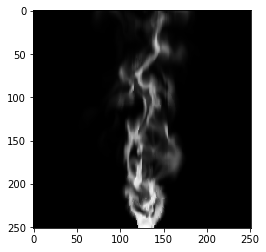

In [45]:
im = imread(output_path + 'vol100.tiff')

plt.imshow(im, cmap='gray')
plt.show()

## Spray Granurality

In [3]:
input_path = 'y:\\projects\\pn-reduction\\simulation\\dt51ns_17timesteps\\'

In [20]:
vol = read_images_from_directory(input_path + '\\01_den\\')

Number of images in directory: 251


In [33]:
frame = 145

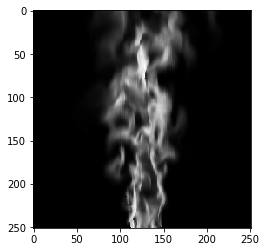

In [34]:
plt.imshow(vol[frame], cmap='gray')
plt.show()

In [22]:
from scipy.ndimage import sobel, generic_gradient_magnitude


grad = generic_gradient_magnitude(vol, sobel)

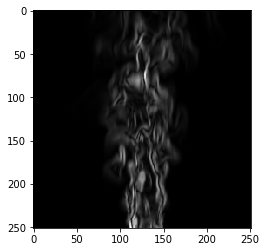

In [35]:
plt.imshow(grad[frame], cmap='gray')
plt.show()

In [24]:
print(np.max(grad))

11523.721


In [27]:
save_np_sequence_as_multitiff_stack(grad, input_path + '\\01_grad.tif')

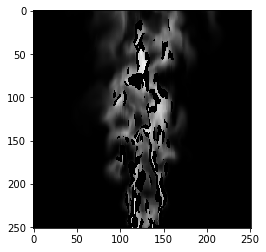

In [36]:
edges = np.where(grad > 2000, 0, 1)

plt.imshow((vol*edges)[frame], cmap='gray')
plt.show()

In [31]:
save_np_sequence_as_multitiff_stack(vol*edges, input_path + '\\01_edges.tif')